# Placement Prediction using RFC and Decision Tree classifier

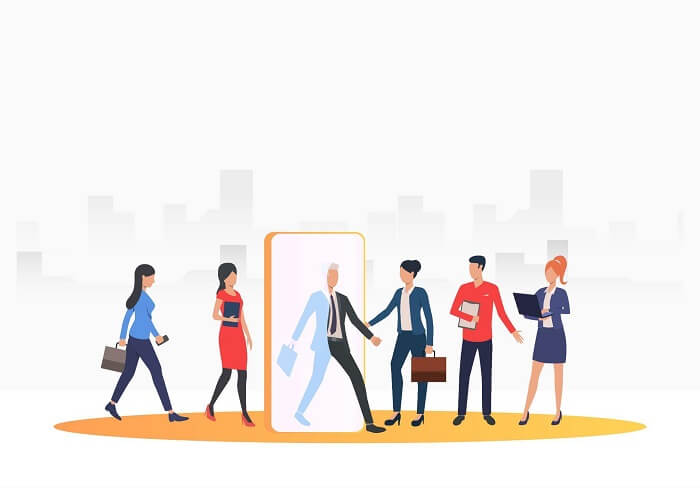

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('collegePlace.csv')

In [3]:
df.shape

(2966, 8)

In [4]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [413]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [415]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [416]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [417]:
#df = df.drop(columns=['Age', 'Hostel'])

In [5]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [6]:
from sklearn import preprocessing

In [7]:
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Stream'] = le.fit_transform(df['Stream'])

In [8]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [422]:
df.describe()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.834457,2.562374,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.371732,1.653853,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,3.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,4.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [10]:
df['Stream'].unique()

array([3, 1, 4, 5, 2, 0])

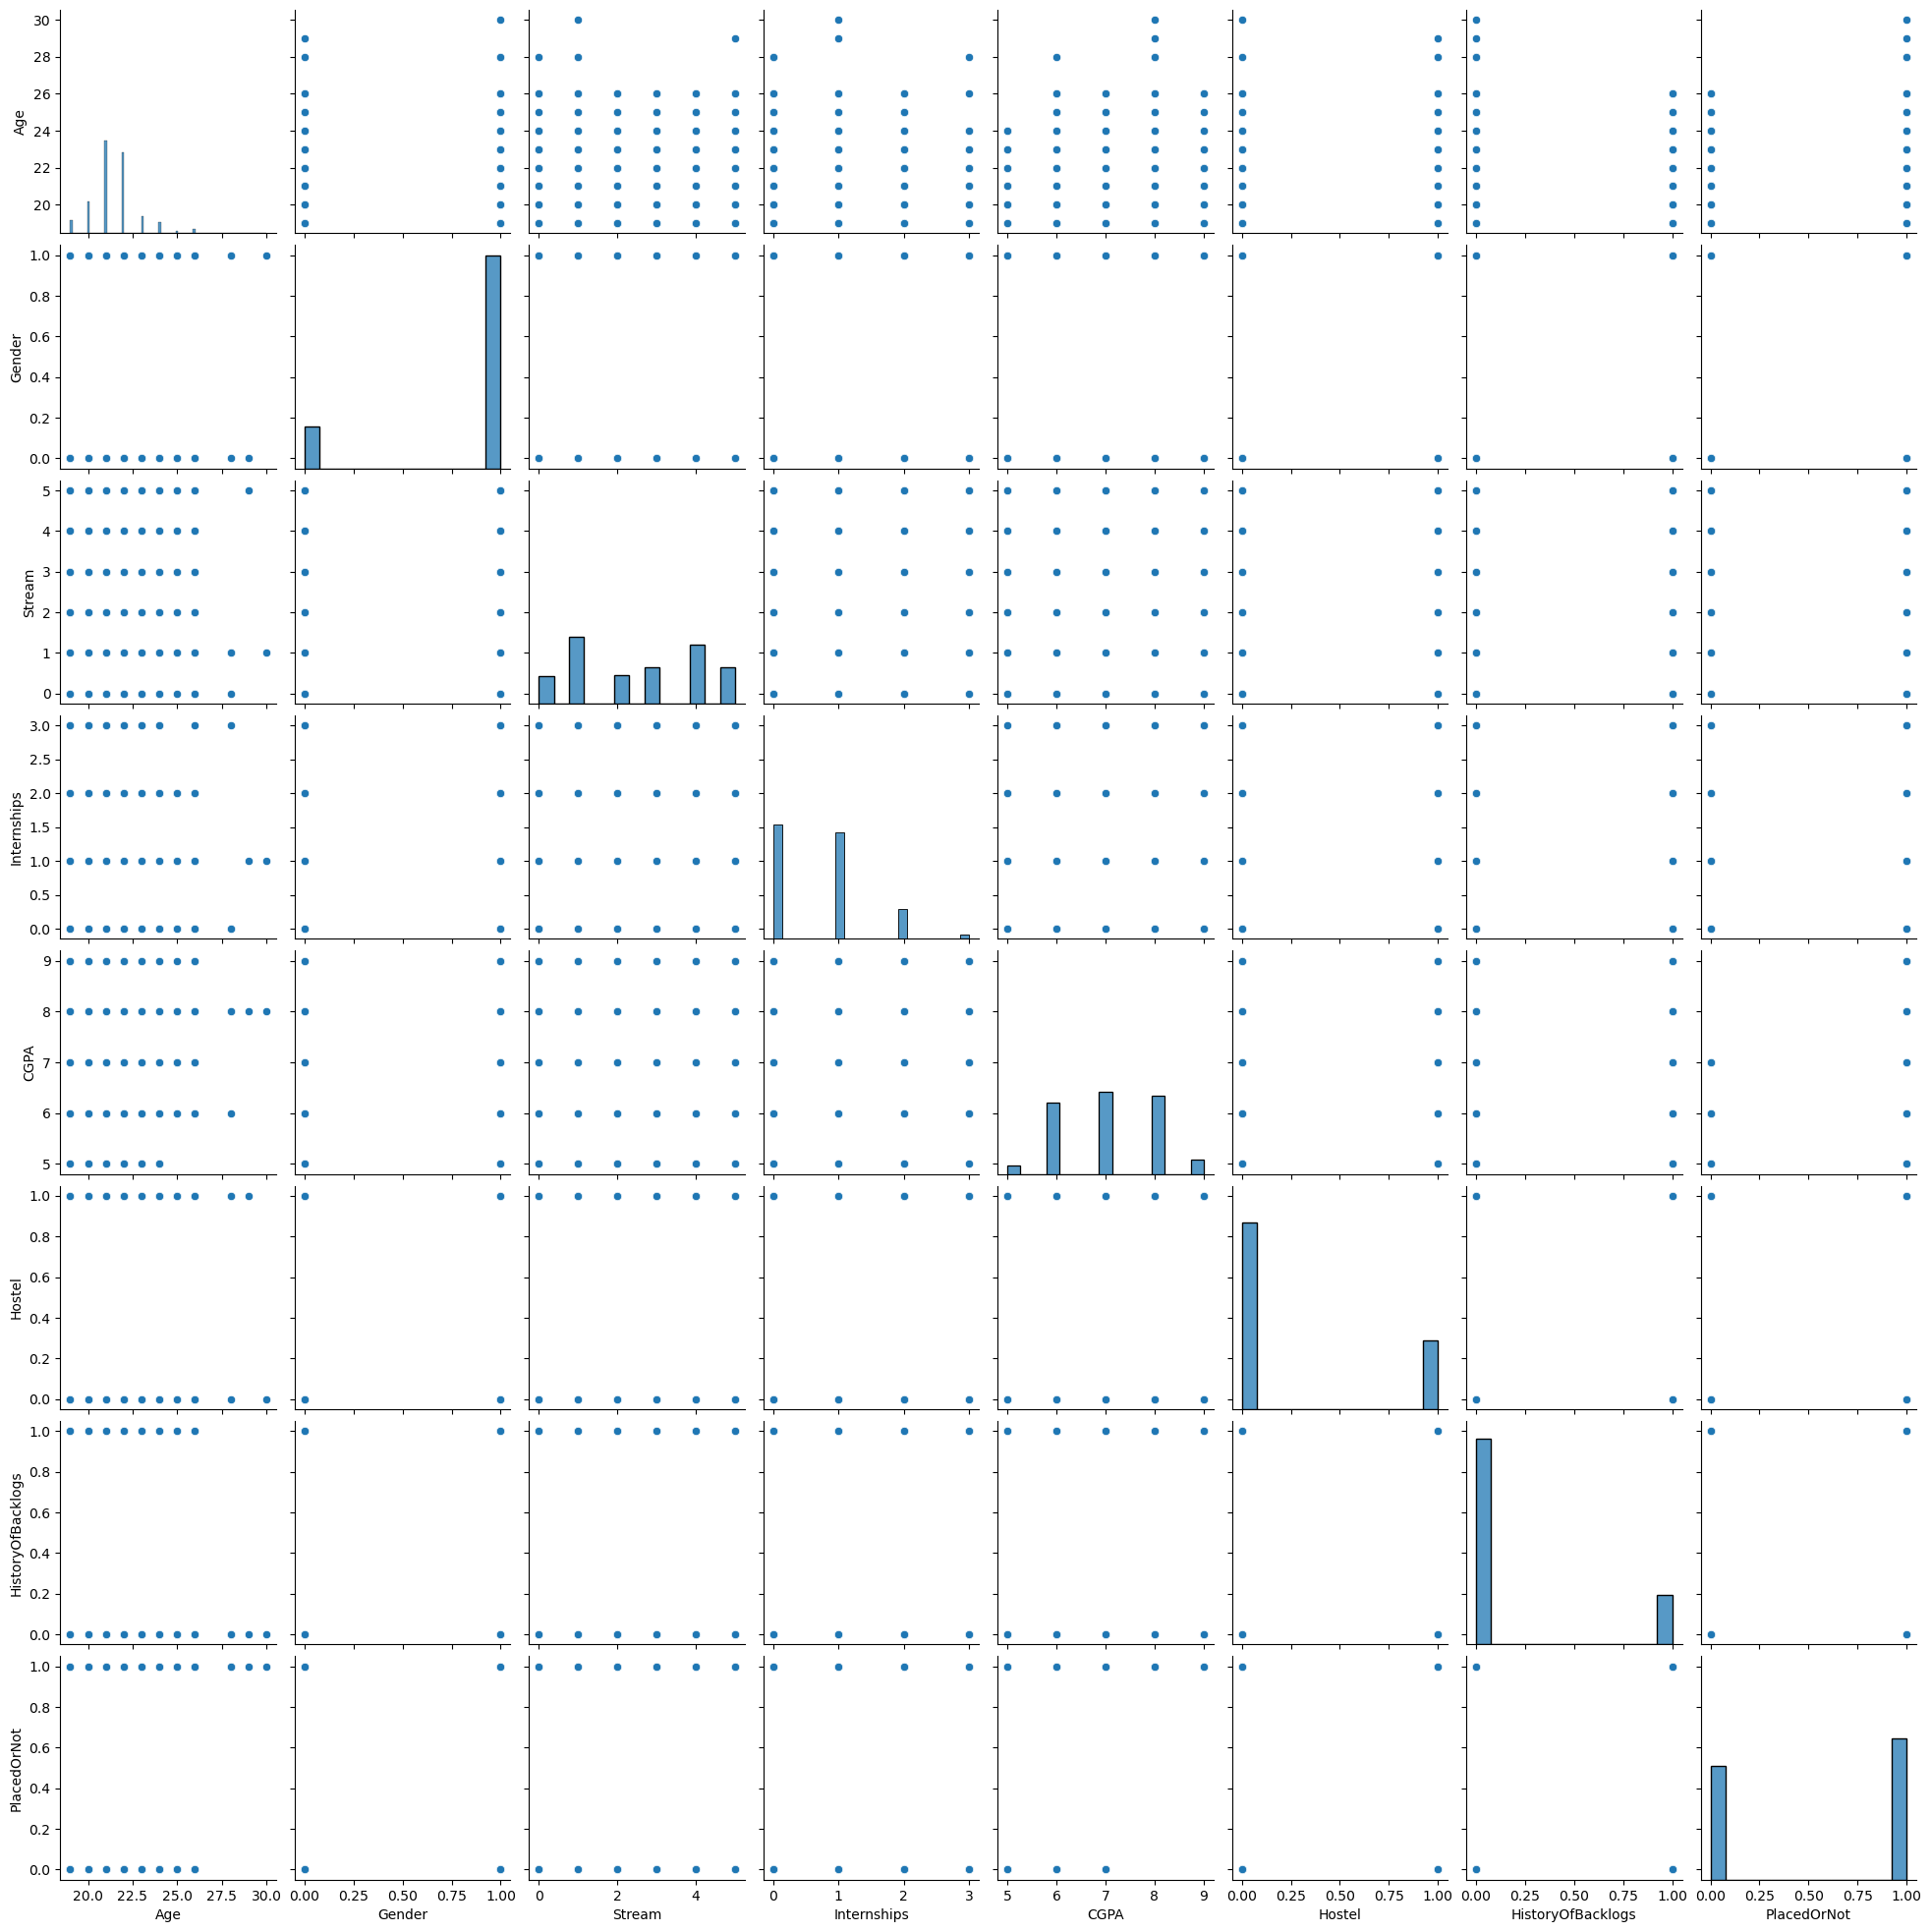

In [9]:
sns.pairplot(df)

In [12]:
df.corr()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,-0.021538,0.008561,0.006552,-0.119787,0.003042,-0.042586,0.046943
Gender,-0.021538,1.000000,0.012138,-0.081526,-0.003512,-0.200254,0.026153,-0.006705
Stream,0.008561,0.012138,1.000000,-0.058317,0.004602,0.275049,0.010064,0.001341
Internships,0.006552,-0.081526,-0.058317,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,-0.003512,0.004602,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,-0.200254,0.275049,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,0.026153,0.010064,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,-0.006705,0.001341,0.179334,0.588648,-0.038182,-0.022337,1.000000


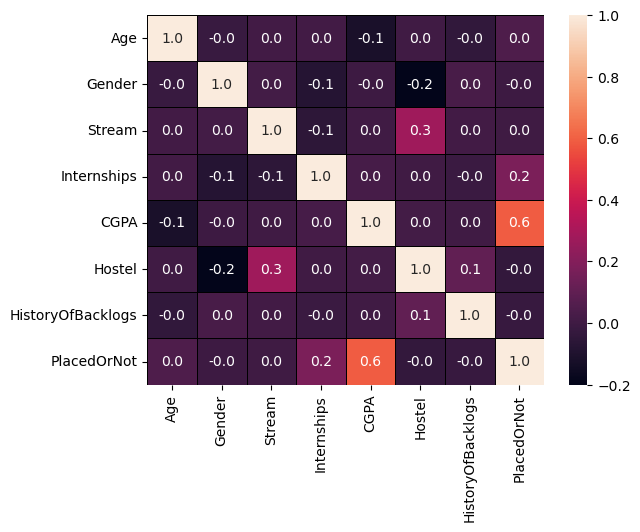

In [13]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f")
plt.show()

Features and Target selection

In [15]:
x = df.drop(columns=['PlacedOrNot','Hostel'])
x

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,1,3,1,8,1
1,21,0,1,0,7,1
2,22,0,4,1,6,0
3,21,1,4,0,8,1
4,22,1,5,0,8,0
...,...,...,...,...,...,...
2961,23,1,4,0,7,0
2962,23,1,5,1,7,0
2963,22,1,4,1,7,0
2964,22,1,1,1,7,0


In [16]:
y = df['PlacedOrNot']
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [18]:
x_train

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
1529,20,1,0,1,6,0
97,22,1,4,0,8,0
357,22,1,2,0,8,0
1948,20,1,4,0,7,1
2815,21,1,4,1,8,1
...,...,...,...,...,...,...
2304,21,1,0,0,7,0
968,21,1,5,0,8,0
1667,20,1,3,0,7,0
1688,24,0,3,0,6,0


In [19]:
x_test

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
1696,22,1,1,0,6,0
1752,20,1,5,0,6,1
2370,19,1,1,1,8,0
2270,19,1,5,1,6,1
87,21,1,1,0,6,0
...,...,...,...,...,...,...
1231,21,1,2,1,7,0
2258,19,1,1,0,7,1
2938,21,1,1,0,7,1
1440,21,1,4,0,7,1


In [20]:
y_train

1529    0
97      1
357     1
1948    1
2815    1
       ..
2304    0
968     1
1667    0
1688    1
1898    1
Name: PlacedOrNot, Length: 2076, dtype: int64

In [21]:
y_test

1696    0
1752    0
2370    1
2270    0
87      0
       ..
1231    1
2258    1
2938    0
1440    0
591     1
Name: PlacedOrNot, Length: 890, dtype: int64

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[370,  26],
       [ 83, 411]], dtype=int64)

In [24]:
acc = metrics.accuracy_score(y_test,y_pred)
acc

0.8775280898876404

In [25]:
pre = metrics.precision_score(y_test,y_pred)
pre

0.9405034324942791

In [26]:
re = metrics.recall_score(y_test,y_pred)
re

0.8319838056680162

In [27]:
f1 = metrics.f1_score(y_test,y_pred)
f1

0.882921589688507

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
classifier= RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None)  
classifier.fit(x_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=1000, n_jobs=1)

In [31]:
y_pred_rf= classifier.predict(x_test)

In [32]:
y_pred_rf

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [33]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred_rf)
cm

array([[371,  25],
       [ 80, 414]], dtype=int64)

In [34]:
acc1 = metrics.accuracy_score(y_test,y_pred)
acc1

0.8775280898876404

In [35]:
pre1 = metrics.precision_score(y_test,y_pred)
pre1

0.9405034324942791

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pickle
import sklearn

In [40]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.26.4
2.1.4
1.2.2


In [49]:
param_grid = {
    
  'n_estimators'     : [300,500,1000],
  'max_depth'        : [None,10,20,30],
  'min_samples_split' : [2,5,10],
  'min_samples_leaf' : [1,2,4]
    
}

In [46]:
rf = RandomForestClassifier(random_state = 42)

In [50]:
#grid search
gc = GridSearchCV(estimator = rf ,param_grid = param_grid, cv = 5, n_jobs = 1,verbose = 2)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END m

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_spli

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; 

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total tim

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; tota

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500; tot

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=10

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300, 500, 1000]},
             verbose=2)

In [51]:
best_rf = gc.best_estimator_

In [52]:
best_rf

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500, random_state=42)

In [53]:
y_pred = best_rf.predict(x_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       396
           1       0.94      0.84      0.89       494

    accuracy                           0.88       890
   macro avg       0.88      0.89      0.88       890
weighted avg       0.89      0.88      0.88       890



In [55]:
with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf,file)